In [1]:
import geopandas as gpd
import osmnx as ox

%matplotlib inline
ox.__version__

'1.1.1'

In [2]:
place ={"city": "Cambridge", "state": "Massachusetts"}
G_cambridge = ox.graph_from_place(place, network_type="drive")

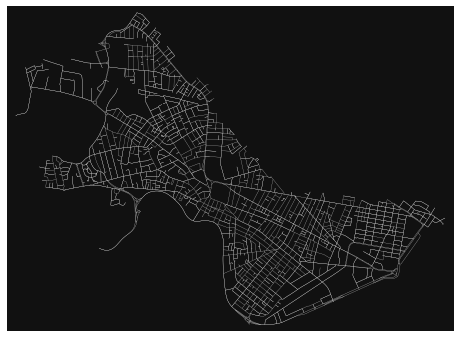

In [3]:
fig, ax = ox.plot_graph(G_cambridge, node_size=0, edge_color="w", edge_linewidth=0.2)

In [4]:
G_c_proj=ox.project_graph(G_cambridge)
ox.save_graph_shapefile(G_c_proj, filepath="./data/cambridge_drive")

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/osmnx/io.py:108: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  gdf_nodes.to_file(filepath_nodes, driver="ESRI Shapefile", index=True, encoding=encoding)


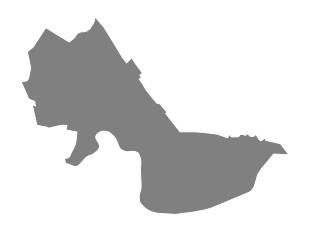

In [5]:
gdf = ox.geocode_to_gdf(place)
gdf_proj = ox.project_gdf(gdf)
ax = gdf_proj.plot(fc="gray", ec="w")
_ = ax.axis("off")

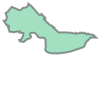

In [6]:
cambridge_b=gdf.loc[0,'geometry']
cambridge_b

In [7]:
gdf.to_file('./data/cambridge-boundary')

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  """Entry point for launching an IPython kernel.


In [8]:
from shapely.geometry import Point  #Polygon
import pandas as pd

In [9]:
demand_raw = pd.read_csv("./data/user_trips_boston_oct7.csv")
demand_raw

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,start_building,start_lon,start_lat,target_building,target_lon,target_lat,start_time,target_time
0,176,2019-10-07 00:00:01.5740,2019-10-07 00:02:57.8570,108,Harvard University / SEAS Cruft-Pierce Halls a...,42.377945,-71.116865,79,Beacon St at Washington / Kirkland,42.378420,...,1983,1,59818,-71.119258,42.376697,7505,-71.105517,42.379790,1.0,177.0
1,193,2019-10-07 00:00:43.0660,2019-10-07 00:03:56.4360,10,B.U. Central - 725 Comm. Ave.,42.350406,-71.108279,19,Park Dr at Buswell St,42.347241,...,1999,2,4431,-71.108971,42.347861,3014,-71.105069,42.345888,43.0,236.0
2,159,2019-10-07 00:01:29.1760,2019-10-07 00:04:08.3340,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,41,Packard's Corner - Commonwealth Ave at Brighto...,42.352261,...,1999,1,85905,-71.118600,42.350370,259381,-71.120532,42.352918,89.0,248.0
3,540,2019-10-07 00:01:30.6650,2019-10-07 00:10:31.6250,3,Colleges of the Fenway - Fenway at Avenue Loui...,42.340115,-71.100619,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,...,1969,0,189985,-71.098160,42.341673,28109,-71.087980,42.338377,90.0,631.0
4,531,2019-10-07 00:01:30.8390,2019-10-07 00:10:22.4090,3,Colleges of the Fenway - Fenway at Avenue Loui...,42.340115,-71.100619,12,Ruggles T Stop - Columbus Ave at Melnea Cass Blvd,42.336244,...,1969,0,187172,-71.097999,42.341802,189420,-71.089306,42.338075,90.0,622.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11195,584,2019-10-07 23:51:51.8570,2019-10-08 00:01:36.2690,53,Beacon St at Massachusetts Ave,42.350827,-71.089811,68,Central Square at Mass Ave / Essex St,42.365070,...,1987,2,247855,-71.089332,42.349879,34861,-71.106639,42.364968,85911.0,86496.0
11196,895,2019-10-07 23:55:16.5130,2019-10-08 00:10:12.3200,9,Commonwealth Ave at Agganis Way,42.351692,-71.119035,361,Deerfield St at Commonwealth Ave,42.349244,...,2000,2,1500,-71.118185,42.349366,246361,-71.097698,42.348365,86116.0,87012.0
11197,394,2019-10-07 23:55:48.3590,2019-10-08 00:02:23.2980,141,Kendall Street,42.363560,-71.082168,380,Mass Ave at Albany St,42.361358,...,1988,1,225269,-71.084351,42.363803,257518,-71.098137,42.361694,86148.0,86543.0
11198,985,2019-10-07 23:56:38.3620,2019-10-08 00:13:03.5320,33,Kenmore Square,42.348706,-71.097009,195,Child St at North St,42.371505,...,2001,1,246541,-71.098726,42.349479,257846,-71.075000,42.370757,86198.0,87183.0


In [10]:
# add new column to df
demand_raw['withinC'] = ""

#Determine if it is inside or not
startwithinClist = []
for lon,lat in zip(demand_raw['start_lon'],demand_raw['start_lat']):
    pt = Point(lon, lat)
    startwithinC = pt.within(cambridge_b)
    #print( withinQ )
    startwithinClist.append(startwithinC)

# update values in the that column, values: True/False
demand_raw['withinC'] = startwithinClist

In [11]:
# select points with start within Cambridge, assign to `demand_start_within` dataframe
demand_start_within = demand_raw[demand_raw.withinC==True]
demand_start_within

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,gender,start_building,start_lon,start_lat,target_building,target_lon,target_lat,start_time,target_time,withinC
0,176,2019-10-07 00:00:01.5740,2019-10-07 00:02:57.8570,108,Harvard University / SEAS Cruft-Pierce Halls a...,42.377945,-71.116865,79,Beacon St at Washington / Kirkland,42.378420,...,1,59818,-71.119258,42.376697,7505,-71.105517,42.379790,1.0,177.0,True
9,597,2019-10-07 00:02:58.3520,2019-10-07 00:12:55.7150,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,361,Deerfield St at Commonwealth Ave,42.349244,...,1,257042,-71.094469,42.361851,260498,-71.095355,42.348876,178.0,775.0,True
13,552,2019-10-07 00:06:52.1970,2019-10-07 00:16:05.0870,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,67,MIT at Mass Ave / Amherst St,42.358100,...,1,6723,-71.112638,42.371827,4334,-71.094142,42.358321,412.0,965.0,True
15,240,2019-10-07 00:07:25.9850,2019-10-07 00:11:26.2400,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,67,MIT at Mass Ave / Amherst St,42.358100,...,1,162289,-71.104401,42.367574,45423,-71.093517,42.358256,445.0,686.0,True
17,942,2019-10-07 00:09:29.2490,2019-10-07 00:25:11.5830,91,One Kendall Square at Hampshire St / Portland St,42.366277,-71.091690,409,Elm St at White St,42.389524,...,1,20723,-71.091455,42.368529,62019,-71.116684,42.390154,569.0,1511.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11178,630,2019-10-07 23:21:24.6630,2019-10-07 23:31:54.9770,177,University Park,42.362648,-71.100061,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,1,225064,-71.103437,42.363581,15936,-71.113138,42.373805,84084.0,84714.0,True
11180,685,2019-10-07 23:21:55.6010,2019-10-07 23:33:20.8260,97,Harvard University River Houses at DeWolfe St ...,42.369190,-71.117141,381,Inman Square at Springfield St.,42.374384,...,1,225518,-71.113867,42.369915,17333,-71.101466,42.373143,84115.0,84800.0,True
11182,592,2019-10-07 23:23:31.4890,2019-10-07 23:33:23.7680,97,Harvard University River Houses at DeWolfe St ...,42.369190,-71.117141,75,Lafayette Square at Mass Ave / Main St / Colum...,42.363465,...,1,89977,-71.114477,42.369020,151827,-71.098995,42.364517,84211.0,84803.0,True
11190,1067,2019-10-07 23:43:46.0110,2019-10-08 00:01:33.6560,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,98,Warren St at Chelsea St,42.371848,...,1,85392,-71.101497,42.366662,3182,-71.063307,42.373132,85426.0,86493.0,True


In [12]:
# add new column to df
demand_start_within['withinCend'] = ""

#Determine if it is inside or not
endwithinClist = []
for lon,lat in zip(demand_start_within['target_lon'],demand_start_within['target_lat']):
    pt = Point(lon, lat)
    endwithinC = pt.within(cambridge_b)
    #print( withinQ )
    endwithinClist.append(endwithinC)

# update values in the that column, values: True/False
demand_start_within['withinCend'] = endwithinClist

/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/naroacorettisanchez/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


In [13]:
# select points with start within Cambridge, assign to `demand_start_within` dataframe
demand_cambridge= demand_start_within[demand_start_within.withinCend==True]
demand_cambridge

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,start_building,start_lon,start_lat,target_building,target_lon,target_lat,start_time,target_time,withinC,withinCend
13,552,2019-10-07 00:06:52.1970,2019-10-07 00:16:05.0870,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,67,MIT at Mass Ave / Amherst St,42.358100,...,6723,-71.112638,42.371827,4334,-71.094142,42.358321,412.0,965.0,True,True
15,240,2019-10-07 00:07:25.9850,2019-10-07 00:11:26.2400,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,67,MIT at Mass Ave / Amherst St,42.358100,...,162289,-71.104401,42.367574,45423,-71.093517,42.358256,445.0,686.0,True,True
19,4217,2019-10-07 00:11:19.1750,2019-10-07 01:21:36.4020,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,189,Kendall T,42.362428,...,91900,-71.090585,42.364568,101528,-71.087481,42.362808,679.0,4896.0,True,True
20,799,2019-10-07 00:11:37.2620,2019-10-07 00:24:56.6760,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,41556,-71.095807,42.356683,120056,-71.112969,42.373363,697.0,1496.0,True,True
21,785,2019-10-07 00:11:47.9830,2019-10-07 00:24:53.6750,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,201809,-71.091085,42.359451,60858,-71.111598,42.370915,707.0,1493.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11172,766,2019-10-07 23:14:09.8870,2019-10-07 23:26:56.2450,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,437,Berkshire Street at Cambridge Street,42.372077,...,57529,-71.119554,42.376996,137762,-71.090969,42.369767,83649.0,84416.0,True,True
11178,630,2019-10-07 23:21:24.6630,2019-10-07 23:31:54.9770,177,University Park,42.362648,-71.100061,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,225064,-71.103437,42.363581,15936,-71.113138,42.373805,84084.0,84714.0,True,True
11180,685,2019-10-07 23:21:55.6010,2019-10-07 23:33:20.8260,97,Harvard University River Houses at DeWolfe St ...,42.369190,-71.117141,381,Inman Square at Springfield St.,42.374384,...,225518,-71.113867,42.369915,17333,-71.101466,42.373143,84115.0,84800.0,True,True
11182,592,2019-10-07 23:23:31.4890,2019-10-07 23:33:23.7680,97,Harvard University River Houses at DeWolfe St ...,42.369190,-71.117141,75,Lafayette Square at Mass Ave / Main St / Colum...,42.363465,...,89977,-71.114477,42.369020,151827,-71.098995,42.364517,84211.0,84803.0,True,True


In [65]:
# DATE FILTER
#start_date = "2019-10-12 00:00:00"
#end_date = "2019-10-13 00:00:00"
#demand_cambridge = demand_cambridge[demand_cambridge["starttime"].between(start_date, end_date)]

In [14]:
demand_cambridge

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,start_building,start_lon,start_lat,target_building,target_lon,target_lat,start_time,target_time,withinC,withinCend
13,552,2019-10-07 00:06:52.1970,2019-10-07 00:16:05.0870,221,Verizon Innovation Hub 10 Ware Street,42.372509,-71.113054,67,MIT at Mass Ave / Amherst St,42.358100,...,6723,-71.112638,42.371827,4334,-71.094142,42.358321,412.0,965.0,True,True
15,240,2019-10-07 00:07:25.9850,2019-10-07 00:11:26.2400,68,Central Square at Mass Ave / Essex St,42.365070,-71.103100,67,MIT at Mass Ave / Amherst St,42.358100,...,162289,-71.104401,42.367574,45423,-71.093517,42.358256,445.0,686.0,True,True
19,4217,2019-10-07 00:11:19.1750,2019-10-07 01:21:36.4020,80,MIT Stata Center at Vassar St / Main St,42.362131,-71.091156,189,Kendall T,42.362428,...,91900,-71.090585,42.364568,101528,-71.087481,42.362808,679.0,4896.0,True,True
20,799,2019-10-07 00:11:37.2620,2019-10-07 00:24:56.6760,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,41556,-71.095807,42.356683,120056,-71.112969,42.373363,697.0,1496.0,True,True
21,785,2019-10-07 00:11:47.9830,2019-10-07 00:24:53.6750,67,MIT at Mass Ave / Amherst St,42.358100,-71.093198,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,201809,-71.091085,42.359451,60858,-71.111598,42.370915,707.0,1493.0,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11172,766,2019-10-07 23:14:09.8870,2019-10-07 23:26:56.2450,89,Harvard Law School at Mass Ave / Jarvis St,42.379011,-71.119945,437,Berkshire Street at Cambridge Street,42.372077,...,57529,-71.119554,42.376996,137762,-71.090969,42.369767,83649.0,84416.0,True,True
11178,630,2019-10-07 23:21:24.6630,2019-10-07 23:31:54.9770,177,University Park,42.362648,-71.100061,96,Cambridge Main Library at Broadway / Trowbridg...,42.373379,...,225064,-71.103437,42.363581,15936,-71.113138,42.373805,84084.0,84714.0,True,True
11180,685,2019-10-07 23:21:55.6010,2019-10-07 23:33:20.8260,97,Harvard University River Houses at DeWolfe St ...,42.369190,-71.117141,381,Inman Square at Springfield St.,42.374384,...,225518,-71.113867,42.369915,17333,-71.101466,42.373143,84115.0,84800.0,True,True
11182,592,2019-10-07 23:23:31.4890,2019-10-07 23:33:23.7680,97,Harvard University River Houses at DeWolfe St ...,42.369190,-71.117141,75,Lafayette Square at Mass Ave / Main St / Colum...,42.363465,...,89977,-71.114477,42.369020,151827,-71.098995,42.364517,84211.0,84803.0,True,True


In [17]:
demand_cambridge.to_csv("./data/user_demand_cambridge_oct7.csv", index=False)
demand_cambridge.to_csv("../includes/Demand/user_demand_cambridge_oct7.csv", index=False)